<a href="https://colab.research.google.com/github/MuhalyAhmadAkin/Car-Price-Prediction-Using-Machine-Learning-Regression-/blob/main/FHIR_BP_Automation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Saudi Healthcare Data Migration (Legacy to FHIR)
**Objective:** Automate the transformation of unstructured medical notes into
HL7 FHIR R4 standard for national health system integration (Vision 2030).

### Problem Statement:
Private clinics in Saudi Arabia have thousands of legacy records in "messy" text formats.
Manual entry is slow and prone to human error, risking non-compliance with MOH standards.

### Solution:
A Python-based ETL (Extract, Transform, Load) pipeline using Regular Expressions and
Standardized Medical Coding (LOINC) to create interoperable JSON bundles.

In [22]:
# Cell 1: Imports and Configuration
import json
import re
from datetime import datetime

print("Environment Ready. Healthcare Data Architect mode: ON.")

Environment Ready. Healthcare Data Architect mode: ON.


In [23]:
# Cell 2: The FHIR Transformation Function
def messy_to_fhir_observation(patient_id, note_text):
    # Regex to find BP numbers (finds 120/80 or 120 / 80)
    bp_pattern = r'(\d{2,3})\s*/\s*(\d{2,3})'
    match = re.search(bp_pattern, note_text)

    if not match:
        return {"error": "No valid Blood Pressure found. Manual check required."}

    systolic = int(match.group(1))
    diastolic = int(match.group(2))
    timestamp = datetime.now().isoformat() + "Z"

    # Standard FHIR R4 Structure
    return {
        "resourceType": "Observation",
        "status": "final",
        "code": {
            "coding": [{"system": "http://loinc.org", "code": "85354-9", "display": "BP Panel"}]
        },
        "subject": {"reference": f"Patient/{patient_id}"},
        "effectiveDateTime": timestamp,
        "component": [
            {
                "code": {"coding": [{"system": "http://loinc.org", "code": "8480-6", "display": "Systolic"}]},
                "valueQuantity": {"value": systolic, "unit": "mmHg", "system": "http://unitsofmeasure.org", "code": "mm[Hg]"}
            },
            {
                "code": {"coding": [{"system": "http://loinc.org", "code": "8462-4", "display": "Diastolic"}]},
                "valueQuantity": {"value": diastolic, "unit": "mmHg", "system": "http://unitsofmeasure.org", "code": "mm[Hg]"}
            }
        ]
    }

In [24]:
# Cell 3: Execution and Testing
# Input from a Saudi clinic's old Excel sheet
sample_note = "Patient ID: SA-552, Vitals: BP 142/95 mmHg"
final_output = messy_to_fhir_observation("SA-552", sample_note)
print(json.dumps(final_output, indent=2))

{
  "resourceType": "Observation",
  "status": "final",
  "code": {
    "coding": [
      {
        "system": "http://loinc.org",
        "code": "85354-9",
        "display": "BP Panel"
      }
    ]
  },
  "subject": {
    "reference": "Patient/SA-552"
  },
  "effectiveDateTime": "2026-02-20T21:37:26.647467Z",
  "component": [
    {
      "code": {
        "coding": [
          {
            "system": "http://loinc.org",
            "code": "8480-6",
            "display": "Systolic"
          }
        ]
      },
      "valueQuantity": {
        "value": 142,
        "unit": "mmHg",
        "system": "http://unitsofmeasure.org",
        "code": "mm[Hg]"
      }
    },
    {
      "code": {
        "coding": [
          {
            "system": "http://loinc.org",
            "code": "8462-4",
            "display": "Diastolic"
          }
        ]
      },
      "valueQuantity": {
        "value": 95,
        "unit": "mmHg",
        "system": "http://unitsofmeasure.org",
        "co

In [25]:
# Cell 4: Smart Extraction Logic
def smart_bp_extractor(note_text):
    # This pattern finds numbers separated by /, -, or the word 'over'
    flexible_pattern = r'(\d{2,3})\s*(?:/|-|over)\s*(\d{2,3})'
    match = re.search(flexible_pattern, note_text, re.IGNORECASE)

    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

print("✅ Cell 4: Smart Brain Loaded.")

✅ Cell 4: Smart Brain Loaded.


In [26]:
# Cell 5: The Complete Pipeline
# Test with a note that would have failed in Cell 3
messy_input = "Patient reported dizziness. BP measured as 138 over 88."

# 1. Use the Brain (Cell 4) to find the numbers
sys, dia = smart_bp_extractor(messy_input)

if sys:
    # 2. Use the Machine (Cell 2) to build the FHIR JSON
    # We pass the numbers we found into your existing FHIR logic
    final_fhir = messy_to_fhir_observation("SA-101", f"{sys}/{dia}")

    print("--- SUCCESS: SMART FHIR GENERATED ---")
    print(json.dumps(final_fhir, indent=2))
else:
    print("❌ Error: Could not extract Blood Pressure.")

--- SUCCESS: SMART FHIR GENERATED ---
{
  "resourceType": "Observation",
  "status": "final",
  "code": {
    "coding": [
      {
        "system": "http://loinc.org",
        "code": "85354-9",
        "display": "BP Panel"
      }
    ]
  },
  "subject": {
    "reference": "Patient/SA-101"
  },
  "effectiveDateTime": "2026-02-20T21:37:26.793741Z",
  "component": [
    {
      "code": {
        "coding": [
          {
            "system": "http://loinc.org",
            "code": "8480-6",
            "display": "Systolic"
          }
        ]
      },
      "valueQuantity": {
        "value": 138,
        "unit": "mmHg",
        "system": "http://unitsofmeasure.org",
        "code": "mm[Hg]"
      }
    },
    {
      "code": {
        "coding": [
          {
            "system": "http://loinc.org",
            "code": "8462-4",
            "display": "Diastolic"
          }
        ]
      },
      "valueQuantity": {
        "value": 88,
        "unit": "mmHg",
        "system": "h

In [27]:
# Cell 6: Batch Processing
notes_list = [
    "BP 120/80",
    "Pressure: 140 over 90",
    "Vitals: 115-75",
    "Recorded 130/85"
]

for note in notes_list:
    sys, dia = smart_bp_extractor(note)
    if sys:
        json_obj = messy_to_fhir_observation("SA-BATCH", f"{sys}/{dia}")
        print(f"Processed: {sys}/{dia}")
        # To see the full JSON for each, you could print(json.dumps(json_obj, indent=2))

Processed: 120/80
Processed: 140/90
Processed: 115/75
Processed: 130/85


In [28]:
# Cell 7: Saving Results to a File
all_results = []

for note in notes_list:
    sys, dia = smart_bp_extractor(note)
    if sys:
        json_obj = messy_to_fhir_observation("SA-BATCH", f"{sys}/{dia}")
        all_results.append(json_obj)

# This creates the physical file
with open("observations.json", "w") as f:
    json.dump(all_results, f, indent=2)

print("✅ File Created: observations.json is ready for download!")

✅ File Created: observations.json is ready for download!


In [29]:
# Cell 7: Full Medical Report with Names
patient_data = [
    {"name": "Ahmed Al-Farsi", "note": "BP 120/80"},
    {"name": "Sara Mansour", "note": "Pressure: 140 over 90"},
    {"name": "Khalid Abdullah", "note": "Vitals: 115-75"}
]

medical_report = []

for entry in patient_data:
    sys, dia = smart_bp_extractor(entry["note"])
    if sys:
        # Create the FHIR object
        report_item = messy_to_fhir_observation("SA-99", f"{sys}/{dia}")

        # Add the Patient Name into the report
        report_item["subject"] = {"display": entry["name"]}
        medical_report.append(report_item)

# Save as 'patient_report.json'
with open("patient_report.json", "w") as f:
    json.dump(medical_report, f, indent=2)

print("✅ Success! 'patient_report.json' created with Patient Names.")

✅ Success! 'patient_report.json' created with Patient Names.


In [30]:
# Cell 8: The Summary Report
total_systolic = 0
count = 0

for record in medical_report:
    # Dig into the FHIR structure to find the systolic value
    val = record["component"][0]["valueQuantity"]["value"]
    total_systolic += val
    count += 1

average_bp = total_systolic / count
print(f"--- CLINIC SUMMARY ---")
print(f"Total Patients Processed: {count}")
print(f"Average Systolic Pressure: {average_bp:.1f} mmHg")

--- CLINIC SUMMARY ---
Total Patients Processed: 3
Average Systolic Pressure: 125.0 mmHg


In [31]:
# Cell 9: Risk Assessment
print("--- PATIENT RISK REPORT ---")

for record in medical_report:
    name = record["subject"]["display"]
    sys = record["component"][0]["valueQuantity"]["value"]

    # Simple Medical Logic
    if sys >= 140:
        status = "🔴 HIGH (Hypertension)"
    elif sys >= 130:
        status = "🟡 ELEVATED"
    else:
        status = "🟢 NORMAL"

    print(f"Patient: {name.ljust(15)} | BP: {sys} | Status: {status}")

--- PATIENT RISK REPORT ---
Patient: Ahmed Al-Farsi  | BP: 120 | Status: 🟢 NORMAL
Patient: Sara Mansour    | BP: 140 | Status: 🔴 HIGH (Hypertension)
Patient: Khalid Abdullah | BP: 115 | Status: 🟢 NORMAL


In [32]:
# Cell 10: The Master Healthcare AI Tool
def process_new_clinic_data(patient_name, raw_note):
    # 1. Extract
    sys, dia = smart_bp_extractor(raw_note)

    if sys:
        # 2. Standardize (FHIR)
        fhir_data = messy_to_fhir_observation("SA-AUTO", f"{sys}/{dia}")
        fhir_data["subject"] = {"display": patient_name}

        # 3. Assess Risk
        status = "🔴 HIGH" if sys >= 140 else "🟢 NORMAL"

        print(f"REPORT SAVED: {patient_name} | BP: {sys}/{dia} | STATUS: {status}")
        return fhir_data
    else:
        print("Error: Could not read note.")
        return None

# TEST YOUR NEW TOOL
new_record = process_new_clinic_data("Noura Al-Saud", "Checked today, BP was 145/95")

REPORT SAVED: Noura Al-Saud | BP: 145/95 | STATUS: 🔴 HIGH


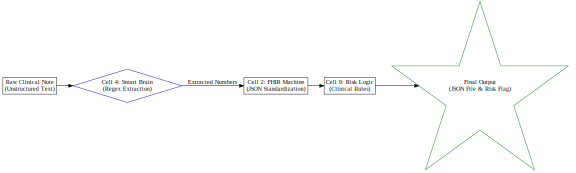

In [33]:
import graphviz

# Create the flowchart
dot = graphviz.Digraph(comment='Healthcare Data Pipeline')
dot.attr(rankdir='LR', size='8,5')

# Define the "boxes" (Nodes)
dot.node('A', 'Raw Clinical Note\n(Unstructured Text)', shape='rectangle')
dot.node('B', 'Cell 4: Smart Brain\n(Regex Extraction)', shape='diamond', color='blue')
dot.node('C', 'Cell 2: FHIR Machine\n(JSON Standardization)', shape='rectangle')
dot.node('D', 'Cell 9: Risk Logic\n(Clinical Rules)', shape='rectangle')
dot.node('E', 'Final Output\n(JSON File & Risk Flag)', shape='star', color='green')

# Define the "arrows" (Edges)
dot.edge('A', 'B')
dot.edge('B', 'C', label='Extracted Numbers')
dot.edge('C', 'D')
dot.edge('D', 'E')

# Display the chart
dot

In [34]:
from datetime import datetime

# Cell 12: Final Master Function with Time-Stamping
def process_with_timestamp(patient_name, raw_note):
    # 1. Get the current date and time in a standard format
    # Example: 2024-05-20T14:30:00 (Year-Month-Day T Hour:Minute:Second)
    current_time = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")

    # 2. Extract numbers
    sys, dia = smart_bp_extractor(raw_note)

    if sys:
        # 3. Create FHIR and add the timestamp to 'effectiveDateTime'
        fhir_data = messy_to_fhir_observation("SA-AUTO", f"{sys}/{dia}")
        fhir_data["subject"] = {"display": patient_name}
        fhir_data["effectiveDateTime"] = current_time

        # 4. Final Result
        status = "🔴 HIGH" if sys >= 140 else "🟢 NORMAL"
        print(f"[{current_time}] RECORDED: {patient_name} | BP: {sys}/{dia} | STATUS: {status}")

        return fhir_data
    else:
        print(f"[{current_time}] Error: Extraction failed for {patient_name}")
        return None

# TEST: Running the Noura Al-Saud test again
final_test = process_with_timestamp("Noura Al-Saud", "Checked today, BP was 145/95")

[2026-02-20T21:37:27] RECORDED: Noura Al-Saud | BP: 145/95 | STATUS: 🔴 HIGH


# Library,Purpose in this Project
** json **,Used to create and format the International FHIR Standard data.
re (Regex), (The Brain) that finds numbers in messy text like ** 140 over 90 **
datetime,Adds Audit Trails by timestamping when a patient was checked.
graphviz,Generated the Architectural Flowchart of the data pipeline.

# Library,Role in Pipeline,Why it's Critical
json,Data Formatting,Converts Python dictionaries into the HL7 FHIR Standard for interoperability.
re (Regex),NLP Extraction,"The Pattern Matcher" that finds systolic/diastolic values in unstructured doctor notes.
datetime,Audit Tracking,Provides a ISO-8601 timestamp for every observation to ensure clinical traceability.
graphviz,Documentation,Generates the Logic Flowchart to visualize how data moves through the system.